### Notes:
- Move all sessions (grouped by date) to one folder

### Get session info

In [1]:
imgPath = '/Volumes/genie/Jihong_GENIE_stuff/NMJ/LA-GCaMP/'

params = {
          'frameInterval': 33.0,
          'shutterCloseFrames': 12, # No. of frames before shutter open
          'truncatedFrames': 61,    # No. of frames to be further deleted for rendering 1s baseline in plot
          'stimStart': 3527.8       # Time (in ms) when electrical stimulation is delivered
         }


### Import modules

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import scipy.io as sio
from glob import glob


### Data sorting by sensor and averaging all ROIs each individual larva

In [3]:
df = pd.read_excel(imgPath + 'summary_low_affinity_GCaMP_1-160Hz.xlsx', index_col = 0)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 10)
# df


In [4]:
def getSessionInfo(imgPath):
    filePath = [d for d in os.listdir(imgPath) if os.path.isdir(os.path.join(imgPath, d))]
    return filePath


In [5]:
datePath = getSessionInfo(imgPath)
datePath = sorted(datePath)


In [10]:
i = 0
dff_all = {}
for date in datePath:
    larvaID = getSessionInfo(os.path.join(imgPath, date))
    larvaID = sorted(larvaID)
    for larva in larvaID:
        fovPath = getSessionInfo(os.path.join(imgPath, date, larva))
        dffList = []
        f0List = []
        for fov in fovPath:
            sumPath = os.path.join(imgPath, date, larva, fov, 'summary')
            matFile = sumPath + '/_dff.mat'
            print(os.path.exists(matFile))
            if not os.path.exists(matFile):
                print (sumPath)
                continue
            dffSingleFOV = sio.loadmat(matFile)
            dffArray = dffSingleFOV['dff']
            dffList.append(dffArray[:7,:,:]) # Keep 1-160 Hz trials only
            
            matFile = sumPath + '/_f0.mat'
            f0SingleFOV = sio.loadmat(matFile)
            f0Array = f0SingleFOV['f0']
            f0List.append(f0Array[:7,:]) # Keep 1-160 Hz trials only
            i+=1  
        dffAllROIs = np.concatenate(dffList, axis=1)
        f0AllROIs = np.concatenate(f0List, axis=1)
        dffMean = np.mean(dffAllROIs, axis = 1)
        f0Mean = np.mean(f0AllROIs, axis = 1)
        sensor = df.loc[(df['Date'] == int(date))&(df['Larva_ID'] == larva), 'Sensor'].values[0]
        sumPath = '/Volumes/genie/Jihong_GENIE_stuff/NMJ/LA-GCaMP-summary-by-larva/' + sensor
        if not os.path.exists(sumPath):
            os.makedirs(sumPath)
        sio.savemat(sumPath + '/' + date + larva + '_dff.mat', dict(dff=dffMean))
        sio.savemat(sumPath + '/' + date + larva + '_f0.mat', dict(f0=f0Mean))
print ("Total sessions (FOV): %d" %i)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


ValueError: need at least one array to concatenate

### Group dff traces by sensor type

In [12]:
sensorTypes = df.Sensor.unique()
print(sensorTypes)
print(len(sensorTypes))
dffAll = {}
f0All = {}

for sensor in(sensorTypes):
    print(sensor)
    sumPath = '/Volumes/genie/Jihong_GENIE_stuff/NMJ/LA-GCaMP-summary-by-larva/' + sensor
    dffList = []
    f0List = []
    matFiles = glob(sumPath + '/*_dff.mat')
    for matFile in(matFiles):
        dffSingleLarva = sio.loadmat(matFile)
        dffArray = dffSingleLarva['dff']
#         print dffArray.shape
        dffList.append(dffArray)
#     print len(dffList)
    dffAll[sensor] = dffList
    matFiles = glob(sumPath + '/*_f0.mat')
    for matFile in(matFiles):
        f0SingleLarva = sio.loadmat(matFile)
        f0Array = f0SingleLarva['f0']
#         print dffArray.shape
        f0List.append(f0Array)
    print(len(dffList))
    f0All[sensor] = f0List


['GCaMP6s' 'GCaMP725' 'GCaMP734' 'GCaMP779' 'GCaMP804' 'GCaMP834'
 'GCaMP783' 'GCaMP6f']
8
GCaMP6s
4
GCaMP725
4
GCaMP734
4
GCaMP779
4
GCaMP804
4
GCaMP834
4
GCaMP783
4
GCaMP6f
3


In [15]:
i = 0
for k, v in dffAll.items(): # dffAll.items() for Python 3
    print(k)
    print(v[i].shape)
    

GCaMP6s
(7, 405)
GCaMP725
(7, 405)
GCaMP734
(7, 405)
GCaMP779
(7, 405)
GCaMP804
(7, 405)
GCaMP834
(7, 405)
GCaMP783
(7, 405)
GCaMP6f
(7, 405)


### dff frequency responses for all sensors

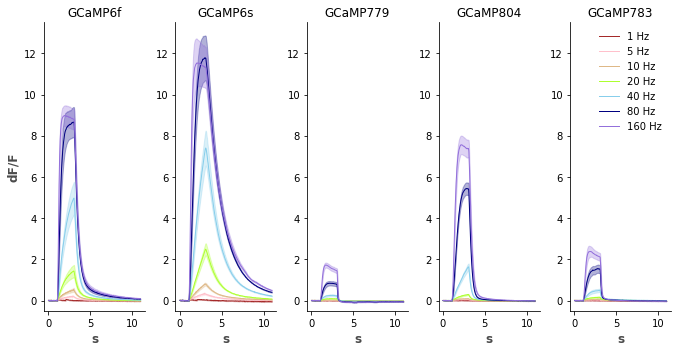

In [38]:
trialMap = {
            1: '1 Hz',
            2: '5 Hz',
            3: '10 Hz',
            4: '20 Hz',
            5: '40 Hz',
            6: '80 Hz',
            7: '160 Hz',
#             8: '240 Hz',
#             9: '320 Hz'
           }

colorMap = {
            1: 'brown',
            2: 'pink',
            3: 'burlywood',
            4: 'greenyellow',
            5: 'skyblue',
            6: 'navy',
            7: 'mediumpurple',
#             8: 'violet',
# #             8: 'k',
#             9: 'goldenrod'
           }

# figOrders = ['GCaMP6s', 'GCaMP7b', 'GCaMP7c', 'GCaMP7f', 'GCaMP7s']
figOrders = [u'GCaMP6f', u'GCaMP6s',u'GCaMP779', u'GCaMP804', u'GCaMP783']
# figOrders = [u'GCaMP6f', u'GCaMP6s', u'GCaMP725', u'GCaMP734', u'GCaMP779', u'GCaMP783', u'GCaMP804', u'GCaMP834']
# figOrders = ['GCaMP6s', 'GCaMP725']
fig = plt.figure(figsize=(len(figOrders)*3,5))
subplotPos = 0
# for sensor, traces in dffAll.iteritems():
for sensor in(figOrders):
    mean = np.mean(dffAll[sensor], axis = 0)
#     print mean.shape
    mean = mean[:, params['truncatedFrames']+params['shutterCloseFrames'] :]
    sem = np.std(dffAll[sensor], axis = 0)/(len(dffAll[sensor]) - 1)

    sem = sem[:, params['truncatedFrames']+params['shutterCloseFrames']:]
    subplotPos += 1
    ax = plt.subplot(1, len(dffAll), subplotPos)
    for trialNum in range(mean.shape[0]):
#     for trialNum in range(3):
        ax.plot(np.arange(1, mean.shape[1] + 1) * params['frameInterval'] / 1000, mean[trialNum], lw=1, label=trialMap[trialNum+1], color = colorMap[trialNum+1])
        ax.fill_between(np.arange(1, mean.shape[1] + 1) * params['frameInterval'] / 1000, mean[trialNum]-sem[trialNum], mean[trialNum]+sem[trialNum], color = colorMap[trialNum+1], alpha=0.3)
        if subplotPos == len(figOrders):
            leg = ax.legend(loc='upper right')
            leg.get_frame().set_linewidth(0.0)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')
        ax.set_title(sensor)
        ax.set_xlabel('s', size=12, color = '#4B4B4B')
        if subplotPos == 1:
            ax.set_ylabel('dF/F', size=12, color = '#4B4B4B')
#     ax.set_ylim([-0.15, 0.2])
#     ax.set_ylim([-0.15, 0.25])
    ax.set_ylim([-0.5, 13.5])

plt.tight_layout()
# ax.legend()
plt.show()
# savePath = os.path.join(imgPath, 'Results', 'GCaMP7')
savePath = '/Users/zhengj10/Desktop'
# savePath = os.path.join(imgPath, 'Results', 'GCaMP_low_affinity_1-640Hz')
# fig.savefig(savePath + '/' + 'GCaMP_low_affinity_1-320Hz_dff.png', dpi = 1200)
# fig.savefig(savePath + '/' + 'GCaMP_low_affinity_1-160Hz_by_larva.png', dpi = 1200)
# fig.savefig(savePath + '/' + 'GCaMP_low_affinity_1-320Hz_dff_zoomed_in.png', dpi = 1200)
# fig.savefig(savePath + '/' + df_sorted.Father_line_landing_site.values[0] + '_dff.png', dpi = 1200)
# fig.savefig(savePath + '/' + df_sorted.Father_line_landing_site.values[0] + '_dff_1-10Hz.png', dpi = 1200)


### F0 for all sensors

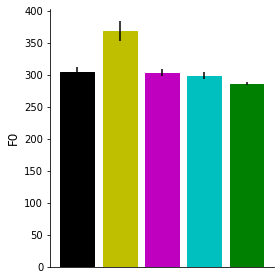

In [52]:
fig = plt.figure(figsize=(4,4))
f0Mean = []
f0Sem = []
for sensor in(figOrders):
    mean = np.mean(f0All[sensor])
    sem = np.std(f0All[sensor])/len(f0All[sensor])
#     sem = np.std(f0All[sensor][0,:])
    f0Mean.append(mean)
    f0Sem.append(sem)
ax = plt.subplot(1, 1, 1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
y_pos = np.arange(1, len(figOrders)+1)
# plt.xticks(y_pos, figOrders, rotation=45, ha = 'right')
colors = ['k', 'y', 'm', 'c', 'g', 'r', 'b', 'brown']
# for xtick, color in zip(ax.get_xticklabels(), colors):
#     xtick.set_color(color)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)


ax.set_ylabel('F0', size=12, weight='light')
barlist = ax.bar(y_pos, f0Mean, yerr = f0Sem)
barlist[0].set_color('k')
barlist[1].set_color('y')
barlist[2].set_color('m')
barlist[3].set_color('c')
barlist[4].set_color('g')
# barlist[5].set_color('r')
# barlist[6].set_color('b')
# barlist[7].set_color('brown')
# plt.rcParams["axes.labelweight"] = "bold"
plt.tight_layout()
plt.show()
# fig.savefig(savePath + '/' + 'GCaMP_low_affinity_1-160Hz_f0_by_larva.png')


In [45]:
ax.set_ylabel?

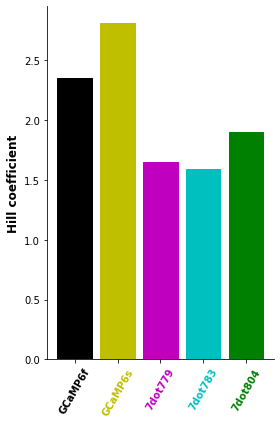

In [18]:
sensors = ['GCaMP6f','GCaMP6s','7dot779','7dot783','7dot804']

# Kd = [412.90,176.50,5399.00,3799.00,892.00]
# fMax = [3622,2813,2741,2754,3031]
# fMin = [66.82,26.41,92.28,98.68,60.71]
hill = [2.355,2.809,1.653,1.59,1.897]


fig = plt.figure(figsize=(4,6))
ax = plt.subplot(1, 1, 1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
y_pos = np.arange(1, len(dffAll)+1)
plt.xticks(y_pos, sensors, rotation=60, weight = 'bold')
colors = ['k', 'y', 'm', 'c', 'g']
for xtick, color in zip(ax.get_xticklabels(), colors):
    xtick.set_color(color)
    
# ax.set_ylabel('Kd(nM)', size=12)
# ax.set_ylabel('Fmax (F/mg/mL protein)', size=12)
# ax.set_ylabel('Fmin (F/mg/mL protein)', size=12)
ax.set_ylabel('Hill coefficient', size=12)

# barlist = ax.bar(np.arange(1,6), Kd)
# barlist = ax.bar(np.arange(1,6), fMax)
# barlist = ax.bar(np.arange(1,6), fMin)
barlist = ax.bar(np.arange(1,6), hill)


barlist[0].set_color('k')
barlist[1].set_color('y')
barlist[2].set_color('m')
barlist[3].set_color('c')
barlist[4].set_color('g')

plt.rcParams["axes.labelweight"] = "bold"
plt.tight_layout()
plt.show()


# fig.savefig(savePath + '/' + 'Kd.png', dpi = 1200)
# fig.savefig(savePath + '/' + 'fMax.png', dpi = 1200)
# fig.savefig(savePath + '/' + 'fMin.png', dpi = 1200)
# fig.savefig(savePath + '/' + 'hill.png', dpi = 1200)



### Compute the half rise time and half decay time

In [76]:
def computeHR(A): # A is all dffTraces with 393 total frames (12 frames deleted from raw)
    idxList = []
    idxPeakList = []
    hfriseList = []
    for larva in range(len(A)):
        trace = A[larva][5,:] ## Must use store the data in another variable othersise np.abs does not work!
        peak = np.max(trace)
        idxPeak = (np.abs(trace-peak)).argmin()
        median = peak/2.0
        idxMedian = (np.abs(trace[:idxPeak]-median)).argmin()
        hfrise = idxMedian/30.303 - 3.5278
        idxList.append(idxMedian)
        idxPeakList.append(idxPeak)
        hfriseList.append(hfrise)     
    return idxList, idxPeakList, hfriseList


In [77]:
def computeHD(A): # A is all dffTraces with 393 total frames (12 frames deleted from raw)
     # If use all the data 
    idxList = []
    hfdecayList = []
    
    for larva in range(len(A)):
        trace = A[larva][5,:]
        traceStartFrame = int(5.5278 * 30.303) # Get the frame # when the stimulation ends
    #     print traceStartFrame
        decayTrace = trace[traceStartFrame:traceStartFrame+60]
        value = decayTrace[0]/2
#         print trace[0]
        idx = (np.abs(decayTrace-value)).argmin()
        halfDecay = idx/30.303
        idxList.append(idx)
        hfdecayList.append(halfDecay)     
    return idxList, hfdecayList


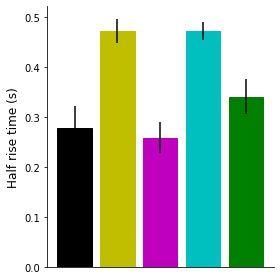

In [80]:
fig = plt.figure(figsize=(4,4))
hfriseMean = []
hfriseSem = []
for sensor in(figOrders):
#     idxList, idxPeakList, hfriseList = computeHR(dffAll[sensor][:,:,params['shutterCloseFrames']:])
    idxList, idxPeakList, hfriseList = computeHR(dffAll[sensor])
    mean = np.mean(hfriseList)
    sem = np.std(hfriseList)/(len(hfriseList)-1)
    hfriseMean.append(mean)
    hfriseSem.append(sem)
ax = plt.subplot(1, 1, 1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
y_pos = np.arange(1, len(figOrders)+1)
# plt.xticks(y_pos, figOrders, rotation=45, weight = 'bold', ha = 'right' )
colors = ['k', 'y', 'm', 'c', 'g', 'r', 'b', 'brown']
# for xtick, color in zip(ax.get_xticklabels(), colors):
#     xtick.set_color(color)


plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

ax.set_ylabel('Half rise time (s)', size=12, weight='light')
barlist = ax.bar(y_pos, hfriseMean, yerr = hfriseSem)
barlist[0].set_color('k')
barlist[1].set_color('y')
barlist[2].set_color('m')
barlist[3].set_color('c')
barlist[4].set_color('g')
# barlist[5].set_color('r')
# barlist[6].set_color('b')
# barlist[7].set_color('brown')
plt.rcParams["axes.labelweight"] = "bold"
plt.tight_layout()
plt.show()
# fig.savefig(savePath + '/' + 'GCaMP_low_affinity_1-160Hz_hr_by_larva.png')


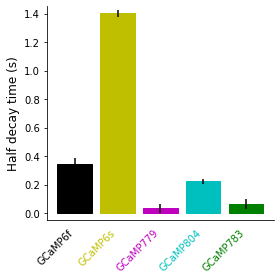

In [81]:
fig = plt.figure(figsize=(4,4))
hfdecayMean = []
hfdecaySem = []
for sensor in(figOrders):
    idxList, hfdecayList = computeHD(dffAll[sensor])
    mean = np.mean(hfdecayList)
    sem = np.std(hfdecayList)/(len(hfdecayList)-1)
    hfdecayMean.append(mean)
    hfdecaySem.append(sem)
ax = plt.subplot(1, 1, 1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
y_pos = np.arange(1, len(figOrders)+1)
plt.xticks(y_pos, figOrders, rotation=45, ha = 'right')

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
)

colors = ['k', 'y', 'm', 'c', 'g', 'r', 'b', 'brown']
for xtick, color in zip(ax.get_xticklabels(), colors):
    xtick.set_color(color)
ax.set_ylabel('Half decay time (s)', size=12, weight='light')
barlist = ax.bar(y_pos, hfdecayMean, yerr = hfriseSem)
barlist[0].set_color('k')
barlist[1].set_color('y')
barlist[2].set_color('m')
barlist[3].set_color('c')
barlist[4].set_color('g')
# barlist[5].set_color('r')
# barlist[6].set_color('b')
# barlist[7].set_color('brown')
# plt.rcParams["axes.labelweight"] = "bold"
ax.set_ylim([-0.05,1.45])
plt.tight_layout()
plt.show()
# fig.savefig(savePath + '/' + 'GCaMP_low_affinity_1-160Hz_hd_by_larva.png')


### Comparison of GCaMP6s and GCaMP7s at 1Hz

In [16]:
# figPos = 0
# sensors = ['GCaMP6s', 'GCaMP7s']
# fig = plt.figure(figsize=(len(sensors)*3, 4))
# ax = plt.subplot(1, 3, 1)
# ax.plot([8,8,10], [0.04,-0.01,-0.01], color='k', lw=1)
# ax.set_xlim([-0.51315, 11.50215])
# ax.set_ylim([-0.08253471782803537, 0.19322907438874246])

# ax.axis('off')

# # (-0.51315, 11.50215) xlim in trace plot
# # (-0.125, 0.14000000000000001) ylim in trace plot
# for sensor in(sensors):
#     figPos += 1
#     trace = dffAll[sensor]
# #     ax_sb = plt.subplot(1, len(sensors)+1, figPos)
# #     ax_sb.plot(np.arange(1, trace.shape[2] + 1 -params['truncatedFrames'])/params['frameRate'], np.zeros(trace.shape[2]- params['truncatedFrames']), lw = 0)
# #     ax_sb.plot([-2, -2, 0], [0.05, -0.05, -0.05], color = 'k')
# #     ax_sb.axis('off')
# #     ax_sb.set_ylim([-0.075, 0.19])
#     ax = plt.subplot(1, len(sensors)+1, figPos+1)
    

#     for roi in range(trace.shape[1]):
#         if sensor == 'GCaMP6s' and np.max(trace[0, roi, :]) > 0.05: # Use this code only if no. of badrois equals 1
#             badRoi = roi
#             continue
#         if sensor == 'GCaMP6s':
#             ax.plot(np.arange(1, len(trace[0, roi, :])+1-params['truncatedFrames']) * params['frameInterval'] / 1000, trace[0, roi, params['truncatedFrames']:], lw=0.7, color = 'lightgrey')
#         else:
#             ax.plot(np.arange(1, len(trace[0, roi, :])+1-params['truncatedFrames'])* params['frameInterval'] / 1000, trace[0, roi, params['truncatedFrames']:], lw=0.7, color = 'pink')
#         ax.set_title(sensor)

#     if sensor == 'GCaMP6s':
        
#         trace = np.delete(trace, badRoi, axis=1)
#         roi -= 1
#         ax.plot(np.arange(1, len(trace[0, roi, :])+1-params['truncatedFrames']) * params['frameInterval'] / 1000, np.mean(trace[0, :, params['truncatedFrames']:], axis = 0), lw=1, color = 'k')
#     else:
#         ax.plot(np.arange(1, len(trace[0, roi, :])+1-params['truncatedFrames']) * params['frameInterval'] / 1000, np.mean(trace[0, :, params['truncatedFrames']:], axis = 0), lw=1, color = 'r')
#     ax.plot([1, 1], [-0.04, -0.07], color = 'k', lw = 1)
#     ax.plot([2, 2], [-0.04, -0.07], color = 'k', lw = 1)
#     ax.axis('off')
#     ax.set_ylim([-0.08253471782803537, 0.19322907438874246])
#     ax.set_xlim([-0.51315, 11.50215])
# # plt.tight_layout()
# plt.show()
# # print ax.get_xlim()
# # print ax.get_ylim()

# # fig.savefig('/Users/zhengj10/Desktop/data/dff_1Hz_VK00005.png', dpi = 1200)


In [17]:
# figPos = 0
# sensors = ['GCaMP6s', 'GCaMP7s']
# fig = plt.figure(figsize=(len(sensors)*3, 4))
# ax = plt.subplot(1, 3, 1)
# ax.plot([8,8,10], [0,-0.05,-0.05], color='k', lw=1)
# ax.set_xlim([-0.51315, 11.50215])
# ax.set_ylim([-0.08253471782803537, 0.19322907438874246])

# ax.axis('off')

# # (-0.51315, 11.50215) xlim in trace plot
# # (-0.125, 0.14000000000000001) ylim in trace plot
# for sensor in(sensors):
#     figPos += 1
#     trace = dffAll[sensor]
# #     ax_sb = plt.subplot(1, len(sensors)+1, figPos)
# #     ax_sb.plot(np.arange(1, trace.shape[2] + 1 -params['truncatedFrames'])/params['frameRate'], np.zeros(trace.shape[2]- params['truncatedFrames']), lw = 0)
# #     ax_sb.plot([-2, -2, 0], [0.05, -0.05, -0.05], color = 'k')
# #     ax_sb.axis('off')
# #     ax_sb.set_ylim([-0.075, 0.19])
#     ax = plt.subplot(1, len(sensors)+1, figPos+1)
    

#     for roi in range(trace.shape[1]):
#         ax.plot(np.arange(1, len(trace[0, roi, :])+1-params['truncatedFrames']) * params['frameInterval'] / 1000, trace[0, roi, params['truncatedFrames']:], lw=0.7, color = 'lightgrey')
        
#     ax.plot(np.arange(1, len(trace[0, roi, :])+1-params['truncatedFrames']) * params['frameInterval'] / 1000, np.mean(trace[0, :, params['truncatedFrames']:], axis = 0), lw=1, color = 'k')    
#     ax.set_title(sensor)

#     ax.plot([1, 1], [-0.04, -0.07], color = 'k', lw = 1)
#     ax.plot([2, 2], [-0.04, -0.07], color = 'k', lw = 1)
#     ax.axis('off')
#     ax.set_ylim([-0.08253471782803537, 0.19322907438874246])
#     ax.set_xlim([-0.51315, 11.50215])
# # plt.tight_layout()
# plt.show()
# # print ax.get_xlim()
# # print ax.get_ylim()

# # fig.savefig('/Users/zhengj10/Desktop/data/dff_1Hz.png', dpi = 1200)


### Report generation

In [19]:
fov_col = df.groupby('Sensor').count()['FOV_ID'] # No. of FOVs
larva_col = df.groupby(['Sensor', 'Date', 'Larva_ID']).count().groupby('Sensor').count()['GenoType'] # No. of larvae
button_col = df.groupby('Sensor').sum()['No_buttons'] # No. of ROIs (Ib buttons)
df_summary = pd.DataFrame({'Sensor': fov_col.index, 'No_larvae': larva_col.values, 'No_FOV': fov_col.values, 'No_buttons':button_col.values}, columns = ['Sensor', 'No_larvae', 'No_FOV', 'No_buttons'])
df_summary.index = np.arange(1, len(df_summary)+1)
# df_summary.to_excel('/Users/zhengj10/Desktop/GENIE/Data/NMJ/GCaMP_low_affinity_1-640Hz_summary_report.xlsx')
df_summary


,Sensor,No_larvae,No_FOV,No_buttons
1,GCaMP6f,3,5,30
2,GCaMP6s,4,8,38
3,GCaMP725,4,9,45
4,GCaMP734,4,8,34
5,GCaMP779,4,7,41
6,GCaMP783,4,7,39
7,GCaMP804,4,7,39
8,GCaMP834,4,5,26


In [ ]:
qq = df_sorted.groupby('Sensor').count()['FOV_ID']

In [ ]:
# df_allGT = pd.DataFrame(columns = ['GenoType', 'LS', 'Sensor', 'No_larvae', 'No_FOV', 'No_buttons'])

# for ls in ['su(Hw)attP5', 'su(Hw)attP8', 'VK00005']:

#     df_sorted = df[df.Father_line_landing_site==ls]
#     a = df_sorted.groupby('Sensor')
#     b = a.GenoType.value_counts()
#     c = b.unstack(level=0)
#     fov_col = df_sorted.groupby('Sensor').count()['FOV_ID'] # No. of FOVs
#     larva_col = df_sorted.groupby(['Sensor', 'Date', 'Larva_ID']).count().groupby('Sensor').count()['GenoType'] # No. of larvae
#     button_col = df_sorted.groupby('Sensor').sum()['No_buttons'] # No. of ROIs (Ib buttons)
#     df_summary = pd.DataFrame({'GenoType': c.index, 'LS': df_sorted.Father_line_landing_site[:len(fov_col)], 'Sensor': fov_col.index, 'No_larvae': larva_col.values, 'No_FOV': fov_col.values, 'No_buttons':button_col.values}, columns = ['GenoType', 'LS', 'Sensor', 'No_larvae', 'No_FOV', 'No_buttons'])
#     df_allGT = df_allGT.append(df_summary, ignore_index = True)

# # df = pd.read_excel(imgPath + 'summary.xlsx', index_col = 0)
# # df_new = pd.DataFrame(sessionInfo, columns = list(df), index = ['i',]) # columns specification keep the order of columns; index specification makes sure dict keys are the columns 
# # df = df.append(df_new, ignore_index = True)
# # df.index = np.arange(1, len(df)+1)
# df_allGT.index = np.arange(1, len(df_allGT)+1)
# df_allGT


In [ ]:
# df_allGT.to_excel('/Users/zhengj10/Desktop/summary.xlsx')

### Stylize table

In [ ]:
# import six

# # df = pd.DataFrame()
# # df['date'] = ['2016-04-01', '2016-04-02', '2016-04-03']
# # df['calories'] = [2200, 2100, 1500]
# # df['sleep hours'] = [2200, 2100, 1500]
# # df['gym'] = [True, False, False]


# def render_mpl_table(data, col_width=5.0, row_height=0.6, font_size=14,
#                      header_color='#353535', row_colors=['#f1f1f2', 'w'], edge_color='w',
#                      bbox=[0, 0, 1, 1], header_columns=0,
#                      ax=None, **kwargs):
#     if ax is None:
#         size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
#         fig, ax = plt.subplots(figsize=size)
#         ax.axis('off')

#     mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

#     mpl_table.auto_set_font_size(False)
#     mpl_table.set_fontsize(font_size)

#     for k, cell in  six.iteritems(mpl_table._cells):
#         cell.set_edgecolor(edge_color)
#         if k[0] == 0 or k[1] < header_columns:
#             cell.set_text_props(weight='bold', color='w')
#             cell.set_facecolor(header_color)
#         else:
#             cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
#     return ax
# # render_mpl_table(df, header_columns=0, col_width=2.0)


In [ ]:
# sumTable = render_mpl_table(df_allGT, header_columns=0, col_width=2.0)
